# Part 5.1: Introduction to Regularization: Ridge and Lasso

Regularization is a technique that reduces overfitting, which occurs when neural networks attempt to memorize training data, rather than learn from it.  Humans are capable of overfitting as well.  Before we examine the ways that a machine accidentally overfits, we will first explore how humans can suffer from it.

Human programmers often take certification exams to show their competence in a given programming language.  To help prepare for these exams, the test makers often make practice exams available.  Consider a programmer who enters a loop of taking the practice exam, studying more, and then taking the practice exam again.  At some point, the programmer has memorized much of the practice exam, rather than learning the techniques necessary to figure out the individual questions.  The programmer has now overfit to the practice exam.  When this programmer takes the real exam, his actual score will likely be lower than what he earned on the practice exam.

A computer can overfit as well.  Although a neural network received a high score on its training data, this result does not mean that the same neural network will score high on data that was not inside the training set.  Regularization is one of the techniques that can prevent overfitting. A number of different regularization techniques exist.  Most work by analyzing and potentially modifying the weights of a neural network as it trains.  

### L1 and L2 Regularization

L1 and L2 regularization are two common regularization techniques that can reduce the effects of overfitting (Ng, 2004).  Both of these algorithms can either work with an objective function or as a part of the backpropagation algorithm.  In both cases the regularization algorithm is attached to the training algorithm by adding an additional objective.  

Both of these algorithms work by adding a weight penalty to the neural network training.  This penalty encourages the neural network to keep the weights to small values.  Both L1 and L2 calculate this penalty differently.  For gradient-descent-based algorithms, such as backpropagation, you can add this penalty calculation to the calculated gradients.  For objective-function-based training, such as simulated annealing, the penalty is negatively combined with the objective score.

We are going to look at linear regression to see how L1 and L2 regularization work.  The following code sets up the auto-mpg data for this purpose.

In [1]:
import numpy as np
import os
import pandas as pd
from scipy.stats import zscore
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
df.info()

# Handling missing values
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy classification
names = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
x = df[names].values
y = df['mpg'].values # Regression

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.25, random_state = 95)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [2]:
# simple finction to evaluate the coefficient  of regression

%matplotlib inline
from IPython.display import display , HTML

def report_coef(names,coef,intercept):
    r = pd.DataFrame( {'coef' : coef, 'positive' : coef>=0 }, index = names )
    r = r.sort_values(by = ['coef'])
    display(r)
    print(f"Intercept :{intercept}")
    r['coef'].plot(kind = 'barh', color = r['positive'].map(
        {True:'b', False:'r'}))
    

# Linear Regression

To understand L1/L2 regularization, it is good to start with linear regression.  L1/L2 were first introduced for [linear regression](https://en.wikipedia.org/wiki/Linear_regression).  They can also be used for neural networks.  To fully understand L1/L2 we will begin with how they are used with linear regression.

The following code uses linear regression to fit the auto-mpg data set.  The RMSE reported will not be as good as a neural network.

Final score (RMSE): 3.465098000092569


,coef,positive
cylinders,-0.229080,False
horsepower,-0.016669,False
weight,-0.006122,False
displacement,0.011694,True
acceleration,0.018535,True
year,0.823123,True
origin,1.163510,True


Intercept :-22.163473860161577


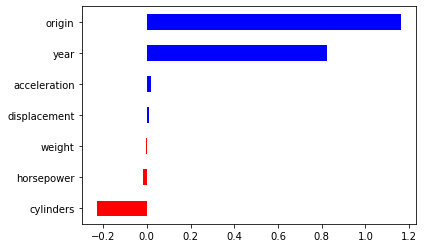

In [6]:
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(X_train,Y_train)
# Predict
pred = regressor.predict(X_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)


# L1 (Lasso) Regularization

L1 Regularization, also called LASSO (Least Absolute Shrinkage and Selection Operator) is should be used to create sparsity in the neural network. In other words, the L1 algorithm will push many weight connections to near 0.  When a weight is near 0, the program drops it from the network.  Dropping weighted connections will create a sparse neural network.

Feature selection is a useful byproduct of sparse neural networks. Features are the values that the training set provides to the input neurons.  Once all the weights of an input neuron reach 0, the neural network training determines that the feature is unnecessary.  If your data set has a large number of input features that may not be needed, L1 regularization can help the neural network detect and ignore unnecessary features.

L1 is implemented by adding the following error to the objective to minimize:

$$ E_1 = \alpha \sum_w{ |w| } $$

You should use L1 regularization to create sparsity in the neural network. In other words, the L1 algorithm will push many weight connections to near 0.  When a weight is near 0, the program drops it from the network.  Dropping weighted connections will create a sparse neural network.
Feature selection is a useful byproduct of sparse neural networks. Features are the values that the training set provides to the input neurons.  Once all the weights of an input neuron reach 0, the neural network training determines that the feature is unnecessary.  If your data set has a large number of input features that may not be needed, L1 regularization can help the neural network detect and ignore unnecessary features.

The following code demonstrates lasso regression.  Notice the effect of the coefficients compared to the previous section that used linear regression.

RMSE score is : 3.465098000092569


,coef,positive
cylinders,-0.229080,False
horsepower,-0.016669,False
weight,-0.006122,False
displacement,0.011694,True
acceleration,0.018535,True
year,0.823123,True
origin,1.163510,True


Intercept :-22.163473860161577


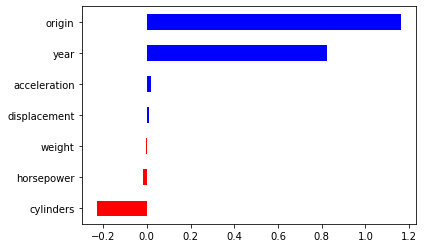

In [4]:
import sklearn
from sklearn.linear_model import Lasso

#Creating Linear Regression
regressor = Lasso(random_state=0, alpha=0.1)

#Training / Fitting Linear regression
regressor.fit(X_train,Y_train)

#Predicting
pred = regressor.predict(X_test)

#Measure RMSE common for regression
score_rmse = np.sqrt(metrics.mean_squared_error(pred, Y_test))
print(f"RMSE score is : {score_rmse}")

report_coef(
    names,
    regressor.coef_,
    regressor.intercept_)

(1e-08, 100000000.0)

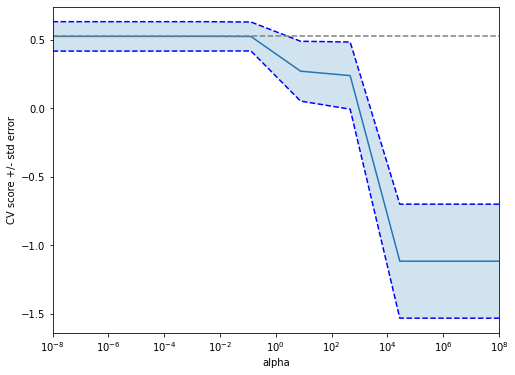

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state=42)
alphas = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# L2 (Ridge) Regularization

You should use Tikhonov/Ridge/L2 regularization when you are less concerned about creating a space network and are more concerned about low weight values.  The lower weight values will typically lead to less overfitting. 

$$ E_2 = \alpha \sum_w{ w^2 } $$

Like the L1 algorithm, the $\alpha$ value determines how important the L2 objective is compared to the neural network’s error.  Typical L2 values are below 0.1 (10%).  The main calculation performed by L2 is the summing of the squares of all of the weights.  The bias values are not summed.

You should use L2 regularization when you are less concerned about creating a space network and are more concerned about low weight values.  The lower weight values will typically lead to less overfitting.  Generally L2 regularization will produce better overall performance than L1.  However, L1 might be useful in situations where there are a large number of inputs and some of the weaker inputs should be pruned.

The following code uses L2 with linear regression (Ridge regression):

RMSE score is : 3.489158408290959


,coef,positive
cylinders,-0.622829,False
horsepower,-0.019304,False
weight,-0.006068,False
displacement,0.020108,True
acceleration,0.039317,True
year,0.831338,True
origin,1.460370,True


Intercept :-22.93944806610588


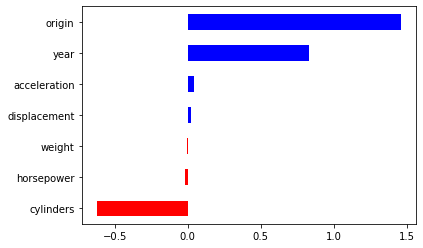

In [8]:
import sklearn
from sklearn.linear_model import Ridge

#Creating Linear Regression
regressor = Ridge(alpha=1)

#Training / Fitting Ridge
regressor.fit(X_train,Y_train)

#Predicting
pred = regressor.predict(X_test)

#Measure RMSE common for regression
score_rmse = np.sqrt(metrics.mean_squared_error(pred, Y_test))
print(f"RMSE score is : {score_rmse}")

report_coef(
    names,
    regressor.coef_,
    regressor.intercept_)

# ElasticNet Regularization

The ElasticNet regression combines both L1 and L2.  Both penalties are applied.  The amount of L1 and L2 are governed by the parameters alpha and beta.

$$ a * L1 + b * L2 $$

Final score (RMSE): 3.471424237420147


,coef,positive
cylinders,-0.422226,False
horsepower,-0.015661,False
weight,-0.006162,False
displacement,0.014897,True
acceleration,0.039071,True
year,0.824649,True
origin,1.144381,True


Intercept :-22.11537410984828


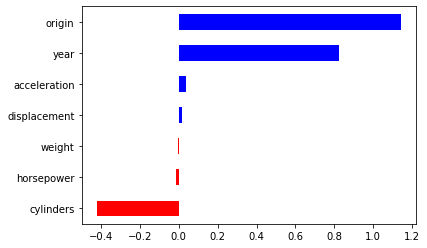

In [11]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train LASSO
regressor.fit(X_train,Y_train)
# Predict
pred = regressor.predict(X_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)